In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Import and Load Data

In [2]:
# Replace with your dataset
data = pd.read_csv('/IBM Hack Chall. Project/Dataset/Placement_Data_Full_Class.csv')

In [3]:
# Print out column names to verify the correct names in your dataset
print(data.columns)

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')


# Step 2: Preprocess Data

In [4]:
# For simplicity, let's handle missing values by dropping them and encoding categorical variables using one-hot encoding.
# Drop rows with missing values
data = data.dropna() 

In [5]:
# Convert target variable to binary values
data['status'] = data['status'].map({'Placed': 1, 'Not Placed': 0})  

In [6]:
data['status']

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [7]:
data = pd.get_dummies(data, columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation'], drop_first=True)

# Step 3: Explore and Visualize Data

Use various visualization techniques (histograms, scatter plots, etc.) to understand the data distribution and relationships.

In [8]:
data.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,55.0,58.80,1,270000,1,1,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,1,200000,1,0,1,0,1,0,1,1,0
2,3,65.00,68.00,64.00,75.0,57.80,1,250000,1,0,0,0,0,0,0,0,0
3,4,56.00,52.00,52.00,66.0,59.43,0,0,1,0,0,0,1,0,1,0,1
4,5,85.80,73.60,73.30,96.8,55.50,1,425000,1,0,0,1,0,0,0,0,0


In [9]:
data.dtypes

sl_no                      int64
ssc_p                    float64
hsc_p                    float64
degree_p                 float64
etest_p                  float64
mba_p                    float64
status                     int64
salary                     int64
gender_M                   uint8
ssc_b_Others               uint8
hsc_b_Others               uint8
hsc_s_Commerce             uint8
hsc_s_Science              uint8
degree_t_Others            uint8
degree_t_Sci&Tech          uint8
workex_Yes                 uint8
specialisation_Mkt&HR      uint8
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sl_no                  215 non-null    int64  
 1   ssc_p                  215 non-null    float64
 2   hsc_p                  215 non-null    float64
 3   degree_p               215 non-null    float64
 4   etest_p                215 non-null    float64
 5   mba_p                  215 non-null    float64
 6   status                 215 non-null    int64  
 7   salary                 215 non-null    int64  
 8   gender_M               215 non-null    uint8  
 9   ssc_b_Others           215 non-null    uint8  
 10  hsc_b_Others           215 non-null    uint8  
 11  hsc_s_Commerce         215 non-null    uint8  
 12  hsc_s_Science          215 non-null    uint8  
 13  degree_t_Others        215 non-null    uint8  
 14  degree_t_Sci&Tech      215 non-null    uint8  
 15  workex

C:\Users\HP\AppData\Local\Temp\ipykernel_12188\3940523221.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Employability percentage')

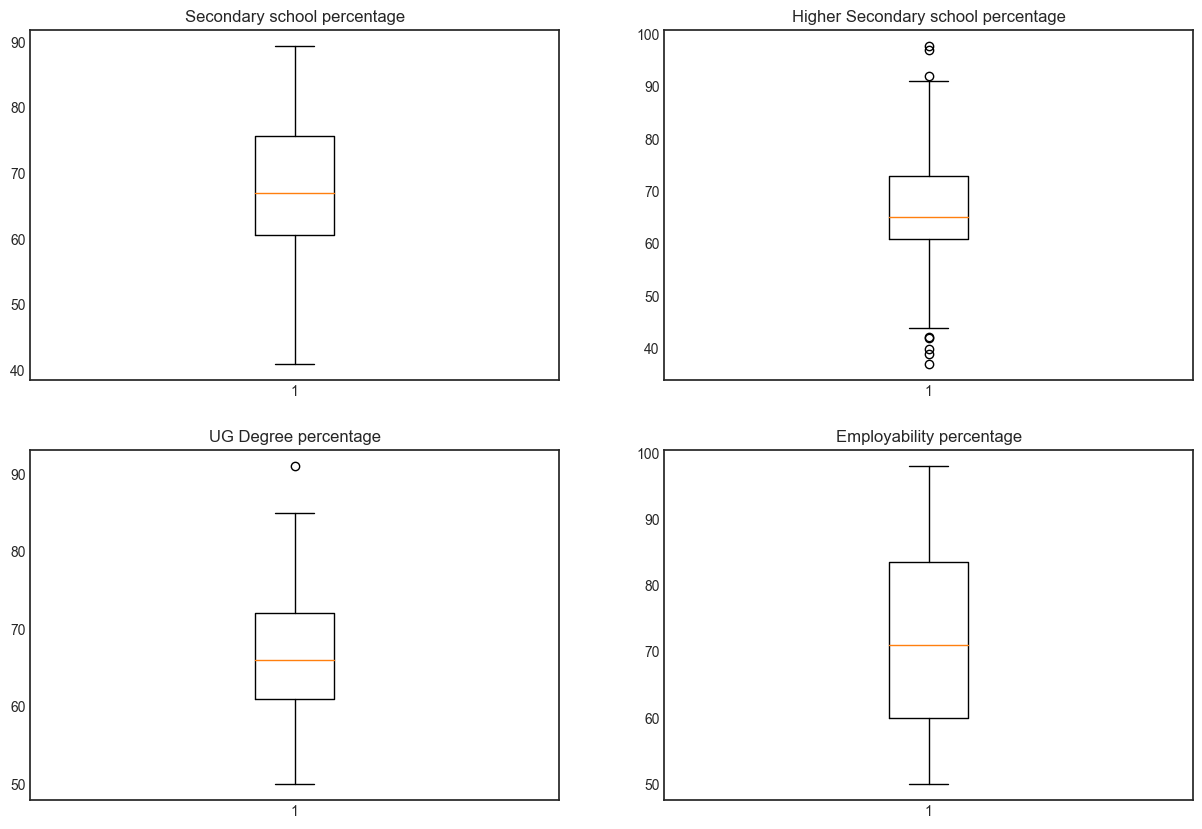

In [11]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(data['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(data['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(data['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(data['etest_p'])
ax.set_title('Employability percentage')

[Text(0, 0, '0'), Text(1, 0, '1')]

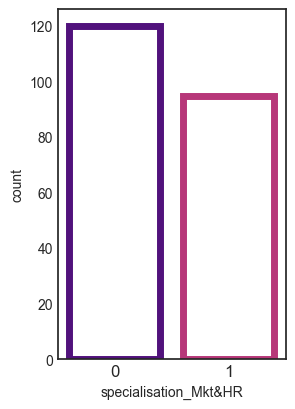

In [12]:
#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation_Mkt&HR", data=data, facecolor=(0, 0, 0, 0),
                linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

# Step 4: Choose a Machine Learning Algorithm

In [13]:
X = data.drop('status', axis=1)  # Features
Y = data['status']  # Target variable

In [14]:
# Check unique classes in the target variable
unique_classes = np.unique(Y)
print("Unique classes in y:", unique_classes)


Unique classes in y: [0 1]


# Step 5: Split the data into training and testing sets

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 6: Train a Machine Learning Model

In [16]:
model = LogisticRegression(solver='liblinear')  # You can replace this with any other suitable algorithm
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

# Step 7: Evaluate the Model

In [17]:
y_pred = model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[12  0]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        31

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



# Additional Step: Visualize Results

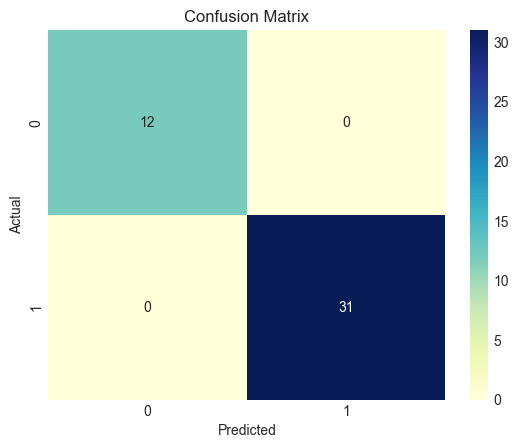

In [18]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()